In [1]:
using Pkg
Pkg.activate("../../Project.toml")

using ITensors
using Plots
using Random
using Interpolations
using LegendrePolynomials

include("../RealRealHighDimension.jl")
include("../benchmarking/benchUtils.jl")

  Activating project at `~/Documents/QML Project/QuantumInspiredML`


get_baseKLD (generic function with 1 method)

In [52]:
function fbasis(n::Integer, x::Number; centre=0) 
    return cispi(n*(x - centre))
end

function nfbasis(nmax, n::Integer, x::Number; centre=0) 
    return cispi(n*(x - centre)) / nmax
end

lbasis(n::Integer, x::Number; centre=0) = Pl(x, n; norm=Val(:normalized)) * Pl(centre, n; norm=Val(:normalized))




lbasis (generic function with 1 method)

In [53]:
bound = 1001
x0 = 0
xs = -range(-1,1,200)

cplt = sum(k -> fbasis.(k, xs; centre=x0), -bound:bound)
cplt_normed = sum(k -> nfbasis.((2*bound+1), k, xs; centre=x0), -bound:bound)

200-element Vector{ComplexF64}:
  -0.0004992511233150275 + 0.0im
  -0.0004888348556630096 - 8.809142651444724e-20im
  -0.0004580104182567493 - 1.3552527156068805e-20im
 -0.00040803402778931354 + 5.421010862427522e-20im
 -0.00034094376860675844 - 2.710505431213761e-19im
  -0.0002594784498428412 - 2.168404344971009e-19im
 -0.00016696846095670003 - 5.421010862427522e-19im
   -6.720287668364564e-5 - 5.421010862427522e-20im
    3.572200655585069e-5 + 4.336808689942018e-19im
   0.0001375667877066535 + 3.7947076036992655e-19im
                         ⋮
    3.572200655585069e-5 - 4.336808689942018e-19im
   -6.720287668364564e-5 + 5.421010862427522e-20im
 -0.00016696846095670003 + 5.421010862427522e-19im
  -0.0002594784498428412 + 2.168404344971009e-19im
 -0.00034094376860675844 + 2.710505431213761e-19im
 -0.00040803402778931354 - 5.421010862427522e-20im
  -0.0004580104182567493 + 1.3552527156068805e-20im
  -0.0004888348556630096 + 8.809142651444724e-20im
  -0.0004992511233150275 + 0.0im

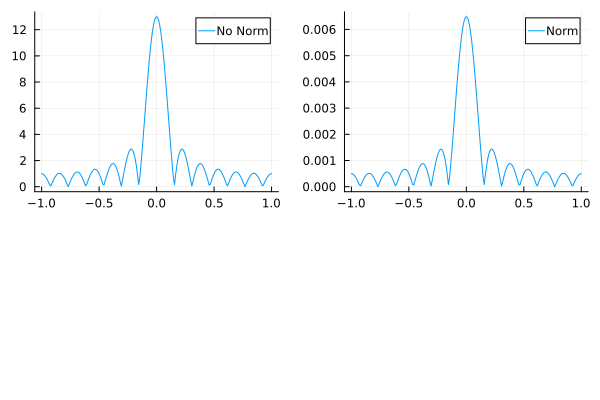

In [54]:
p1 = plot(xs, abs.(cplt), label="No Norm")
p2 = plot(xs, abs.(cplt_normed), label="Norm")

plot([p1, p2]..., layout=[2,1])

In [56]:
bounds = 1:1000
peaks =  [abs(sum(k -> fbasis(k, 0.), -bound:bound)) for bound in bounds];



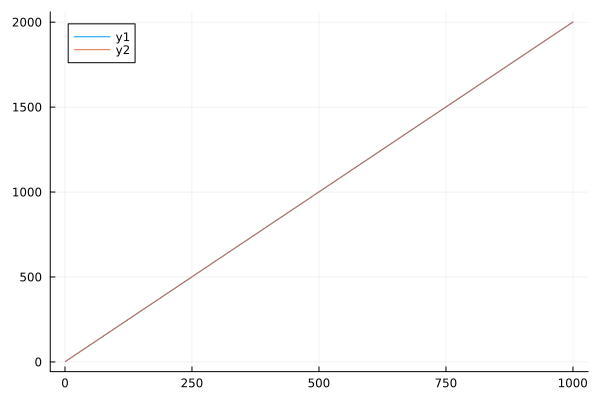

In [57]:
plot(bounds, peaks)
plot!(bounds,  (2 .* bounds) .+1)

In [64]:
function lcomplete(nmax, xs; centre=0)
    series = Matrix{Float64}(undef, length(xs), nmax+1)
    for bound in 0:nmax
        series[:, bound+1] = sum(k -> lbasis.(k, xs), 0:bound)
    end
    return series
end

lcomplete (generic function with 1 method)

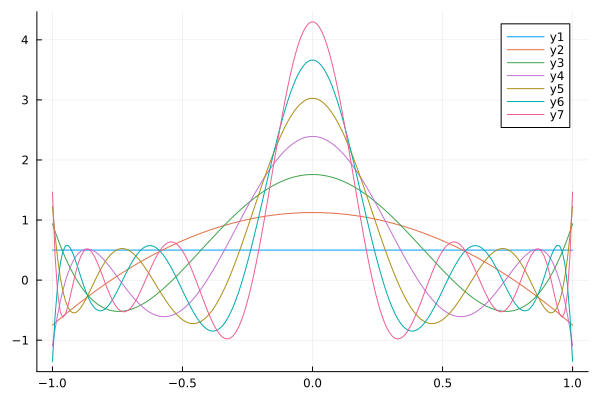

In [104]:
bound = 12
x0 = 0
xs = -range(-1,1,200)
plot(xs,lcomplete(bound, xs) )
# plot(xs,lcomplete(bound, xs)[:,1:2:end] )